In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [170]:
df=pd.read_csv('Car_Price_Prediction.csv')
df.head(10)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
5,Ford,Model C,2015,2.7,81462,Electric,Manual,25509.932876
6,Audi,Model B,2000,1.3,179340,Diesel,Manual,12268.206025
7,Audi,Model C,2018,2.0,165320,Electric,Automatic,27783.737881
8,Honda,Model A,2004,4.4,31159,Electric,Automatic,27392.178421
9,Ford,Model C,2006,4.4,42039,Electric,Automatic,28434.533624


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [172]:
df.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

In [173]:
df.duplicated().sum()

np.int64(0)

In [174]:
df.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


<Axes: ylabel='Price'>

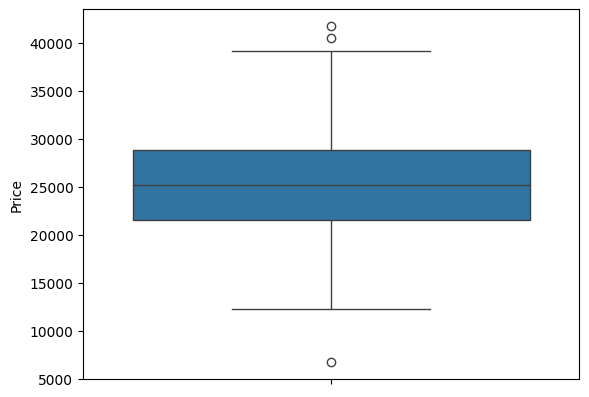

In [175]:
sns.boxplot(y='Price',data=df)

<Axes: ylabel='Mileage'>

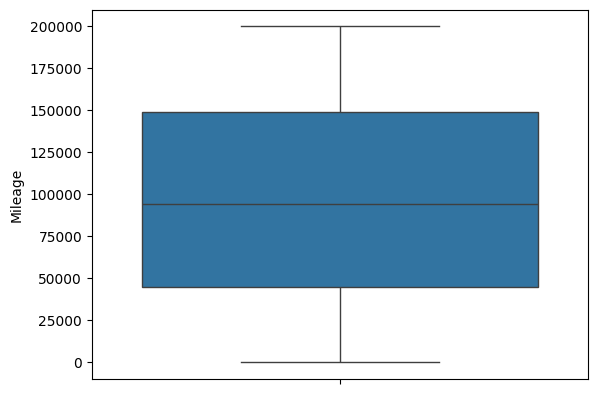

In [176]:
sns.boxplot(y='Mileage',data=df)

<Axes: ylabel='Engine Size'>

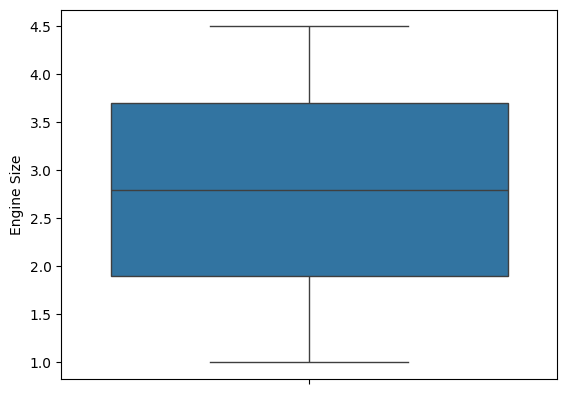

In [177]:
sns.boxplot(y='Engine Size',data=df)

In [178]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [179]:
df['Make'].unique()

array(['Honda', 'Ford', 'BMW', 'Audi', 'Toyota'], dtype=object)

In [180]:
df['Model'].unique()

array(['Model B', 'Model C', 'Model A', 'Model D', 'Model E'],
      dtype=object)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [182]:
copied_dataset=df.copy()

In [183]:
# from sklearn.preprocessing import LabelEncoder
# obj=LabelEncoder()

# for i in df.columns:
#     if df[i].dtype==object:
#         df[i]=obj.fit_transform(df[i])

In [184]:
# LabelEncoding each categorical column separately
from sklearn.preprocessing import LabelEncoder
obj_make = LabelEncoder()
df["Make"] = obj_make.fit_transform(df["Make"])

obj_model = LabelEncoder()
df["Model"] = obj_model.fit_transform(df["Model"])

obj_fuel = LabelEncoder()
df["Fuel Type"] = obj_fuel.fit_transform(df["Fuel Type"])

obj_trans = LabelEncoder()
df["Transmission"] = obj_trans.fit_transform(df["Transmission"])

In [185]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657


In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X=df.drop('Price',axis=1)
y=df['Price']

In [188]:
X

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission
0,3,1,2015,3.9,74176,2,1
1,2,2,2014,1.7,94799,1,0
2,1,1,2006,4.1,98385,1,1
3,3,1,2015,2.6,88919,1,0
4,3,2,2004,3.4,138482,2,0
...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,2,1
996,3,1,2020,3.1,149112,0,1
997,2,2,2008,1.9,195387,2,0
998,4,0,2003,4.4,246,2,0


In [189]:
y

0      30246.207931
1      22785.747684
2      25760.290347
3      25638.003491
4      21021.386657
           ...     
995    22765.597091
996    30392.575567
997    16446.892292
998    27396.156708
999    31620.864907
Name: Price, Length: 1000, dtype: float64

In [190]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [191]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error

In [192]:
Limodel=LinearRegression()
Limodel.fit(Xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [193]:
print(f'training_efficiency:{Limodel.score(Xtrain,ytrain)}')
print(f'testing_efficiency:{Limodel.score(Xtest,ytest)}')

training_efficiency:0.8446219786687317
testing_efficiency:0.8251833567023288


In [194]:
ypred=Limodel.predict(Xtest)

In [195]:
r2_score(ytest,ypred)

0.8251833567023288

In [196]:
print(f"MAE: {mean_absolute_error(ytest, ypred)}")
print(f"MSE: {mean_squared_error(ytest, ypred)}")

MAE: 1711.7090191379957
MSE: 4562408.620090136


In [197]:
Lamodel=Lasso(alpha=0.1)
Lamodel.fit(Xtrain,ytrain)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [198]:
print(f'training_efficiency:{Lamodel.score(Xtrain,ytrain)}')
print(f'testing_efficiency:{Lamodel.score(Xtest,ytest)}')

training_efficiency:0.8446219759842012
testing_efficiency:0.8251893789036685


In [199]:
Rmodel=Ridge(alpha=1.0)
Rmodel.fit(Xtrain,ytrain)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [200]:
print(f'training_efficiency:{Rmodel.score(Xtrain,ytrain)}')
print(f'testing_efficiency:{Rmodel.score(Xtest,ytest)}')

training_efficiency:0.8446216931069332
testing_efficiency:0.825232534947313


In [201]:
from sklearn.ensemble import RandomForestRegressor
RFmodel=RandomForestRegressor(random_state=42)
params={
    "n_estimators":[100,150,200,250,300],
    "max_depth":[3,4,5,6]
}

In [202]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=RFmodel,param_grid=params,cv=5)
grid.fit(Xtrain,ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [203]:
print(f'training_efficiency:{grid.score(Xtrain,ytrain)}')
print(f'testing_efficiency:{grid.score(Xtest,ytest)}')

training_efficiency:0.905781705237064
testing_efficiency:0.7927120618975008


In [204]:
# Random forest regressor are overfitting so we can deploy our model using Linear Regression Model

In [205]:
with open('RFmodel.pkl','wb') as file:
    pickle.dump(Limodel,file)

In [206]:
copied_dataset.to_csv('copied.csv')

In [210]:
with open("encoders.pkl", "wb") as file:
    pickle.dump({"make": obj_make,"model": obj_model,"fuel": obj_fuel,"trans": obj_trans}, file)